In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import pandas as pd
%cd /content/drive/MyDrive/Colab Notebooks
df= pd.read_csv('Delhi-Metro-Network.csv')
df.head(10)

/content/drive/MyDrive/Colab Notebooks


,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260
5,6,Dilli Haat INA [Conn: Yellow],24.9,Pink line,2018-06-08,Underground,28.574408,77.210241
6,7,Noida Sector 143,11.5,Aqua line,2019-01-25,Elevated,28.502663,77.426256
7,8,Moolchand,15.1,Voilet line,2010-03-10,Elevated,28.564170,77.234230
8,9,Chawri Bazar,15.3,Yellow line,2005-03-07,Underground,28.649310,77.226370
9,10,Maya Puri,12.8,Pink line,2018-03-14,Elevated,28.637179,77.129733


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Station ID                285 non-null    int64         
 1   Station Name              285 non-null    object        
 2   Distance from Start (km)  285 non-null    float64       
 3   Line                      285 non-null    object        
 4   Opening Date              285 non-null    datetime64[ns]
 5   Station Layout            285 non-null    object        
 6   Latitude                  285 non-null    float64       
 7   Longitude                 285 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(3)
memory usage: 17.9+ KB


In [29]:
df['Opening Date'] = pd.to_datetime(df['Opening Date'])

In [84]:
df.describe()

,Station ID,Distance from Start (km),Opening Date,Latitude,Longitude,Opening Year
count,285.000000,285.000000,285,285.000000,285.000000,285
mean,143.000000,19.218947,2013-01-23 09:00:37.894736896,28.595428,77.029315,2012-07-30 22:29:03.157894656
min,1.000000,0.000000,2002-12-24 00:00:00,27.920862,28.698807,2002-01-01 00:00:00
25%,72.000000,7.300000,2009-12-11 00:00:00,28.545828,77.107130,2009-01-01 00:00:00
50%,143.000000,17.400000,2011-08-15 00:00:00,28.613453,77.207220,2011-01-01 00:00:00
75%,214.000000,28.800000,2018-06-08 00:00:00,28.666360,77.281165,2018-01-01 00:00:00
max,285.000000,52.700000,2019-09-03 00:00:00,28.878965,77.554479,2019-01-01 00:00:00
std,82.416625,14.002862,NaN,0.091316,2.875400,NaN


In [85]:
df.isnull().sum()

Station ID                  0
Station Name                0
Distance from Start (km)    0
Line                        0
Opening Date                0
Station Layout              0
Latitude                    0
Longitude                   0
Opening Year                0
dtype: int64

<Axes: title={'center': 'Number of Stations on Each Line'}, xlabel='Line'>

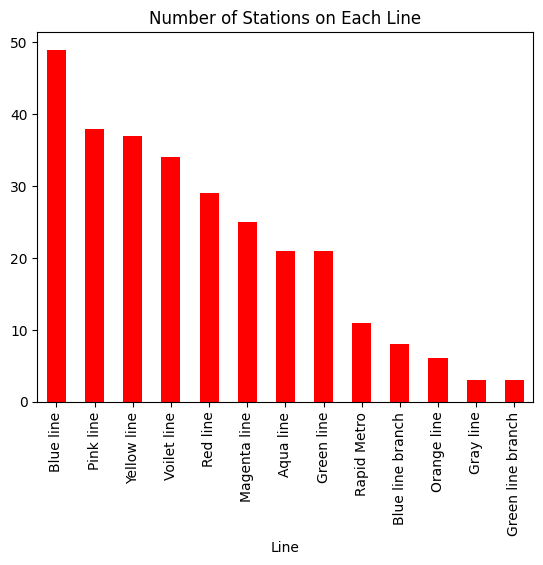

In [86]:
stations_per_line = df.groupby('Line')['Station Name'].count()
stations_per_line.sort_values(ascending=False).plot(kind='bar', title = 'Number of Stations on Each Line', color = 'red')

Blue Line has the highest number od stations on the grid

<Axes: title={'center': 'Longest Line'}, xlabel='Line'>

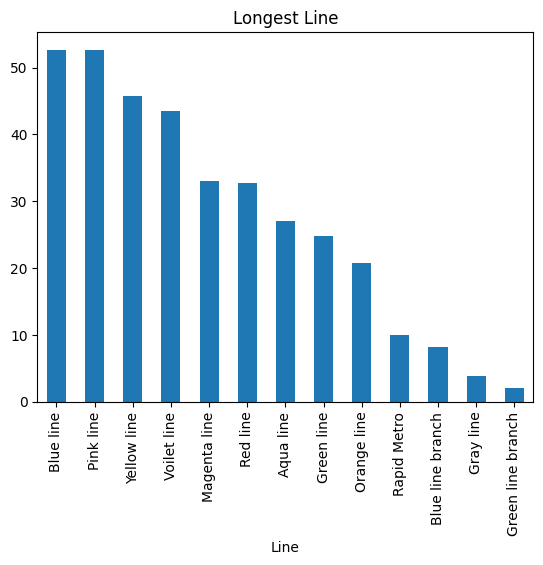

In [24]:
line_distance = df.groupby('Line')['Distance from Start (km)'].max()
line_distance.sort_values(ascending=False).plot(kind='bar', title='Longest Line')


Blue Line is the longest line among all while Green Line is the shortest.

In [57]:
df['Opening Year'] = df['Opening Date'].dt.year
df['Opening Year'] = pd.to_datetime(df['Opening Year'], format='%Y')
df

,Station ID,Station Name,Distance from Start (km),Line,Opening Date,Station Layout,Latitude,Longitude,Opening Year
0,1,Jhil Mil,10.3,Red line,2008-04-06,Elevated,28.675790,77.312390,2008-01-01
1,2,Welcome [Conn: Red],46.8,Pink line,2018-10-31,Elevated,28.671800,77.277560,2018-01-01
2,3,DLF Phase 3,10.0,Rapid Metro,2013-11-14,Elevated,28.493600,77.093500,2013-01-01
3,4,Okhla NSIC,23.8,Magenta line,2017-12-25,Elevated,28.554483,77.264849,2017-01-01
4,5,Dwarka Mor,10.2,Blue line,2005-12-30,Elevated,28.619320,77.033260,2005-01-01
...,...,...,...,...,...,...,...,...,...
280,281,Bata Chowk,38.3,Voilet line,2015-06-09,Elevated,28.385836,77.313462,2015-01-01
281,282,Dwarka Sector 12,5.8,Blue line,2006-01-04,Elevated,28.592320,77.040510,2006-01-01
282,283,Noida Sector 18,43.6,Blue line,2009-12-11,Elevated,28.570810,77.326120,2009-01-01
283,284,Knowledge Park II,21.4,Aqua line,2019-01-25,Elevated,28.456867,77.500054,2019-01-01


<Axes: title={'center': 'New Stations per Year'}, xlabel='Opening Year'>

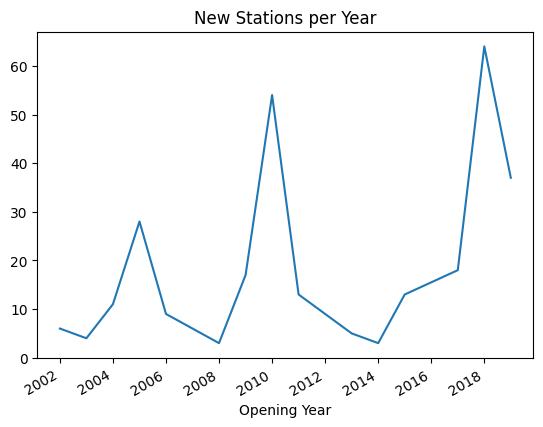

In [58]:
station_opening = df.groupby(['Opening Year'])['Station Name'].count()
station_opening.plot(title= 'New Stations per Year')

2018 was the year with the highest number of newly commissioned station. In some years new station opening was very less probably due to funds or conrstruction difficulties

In [83]:
avg_distance_btwn_stations = line_distance/stations_per_line
avg_distance_btwn_stations.sort_values(ascending= False)

Line
Orange line          3.466667
Pink line            1.384211
Magenta line         1.324000
Gray line            1.300000
Aqua line            1.290476
Voilet line          1.279412
Yellow line          1.235135
Green line           1.180952
Red line             1.127586
Blue line            1.075510
Blue line branch     1.012500
Rapid Metro          0.909091
Green line branch    0.700000
dtype: float64

Orange Line has farthest staions from each other while Green Line Branch has stations closeby.

<Axes: xlabel='Station Layout'>

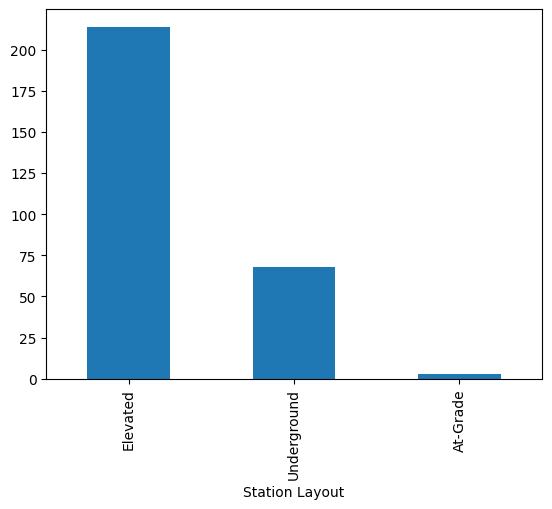

In [67]:
layout_count = df.groupby('Station Layout')['Station Name'].count()
layout_count.sort_values(ascending = False).plot.bar()

Most of the station are Elevated and least are at ground level since it requires more land area.